# Оглавление

* [1.Осмотр данных](#chapter1)
  
* [2.Проверка](#chapter2)
  
* [3.EDA](#chapter3)
  
* [4.Выводы](#chapter4)


In [ ]:
# Устанавливаем необходимые библиотеки
!pip install -q pandas matplotlib seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
file_path = 'dataset/ds_salaries.csv'

In [4]:
df = pd.read_csv(file_path)

# 1. Осмотр данных <a class="anchor" id="chapter1"></a>

In [5]:
df.sample(n=5).T

,1057,122,2535,3064,2052
work_year,2023,2023,2022,2022,2022
experience_level,SE,SE,SE,EX,SE
employment_type,FT,FT,FT,FT,FT
job_title,Data Analyst,Machine Learning Engineer,Data Engineer,Research Scientist,Data Scientist
salary,180000,188800,117000,80000,173000
salary_currency,USD,USD,USD,EUR,USD
salary_in_usd,180000,188800,117000,84053,173000
employee_residence,US,US,US,NL,US
remote_ratio,0,100,0,0,100
company_location,US,US,US,NL,US


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
df.describe().round(3)

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000,3.755000e+03,3755.000,3755.000
mean,2022.374,1.906956e+05,137570.390,46.272
std,0.691,6.716765e+05,63055.625,48.589
min,2020.000,6.000000e+03,5132.000,0.000
25%,2022.000,1.000000e+05,95000.000,0.000
50%,2022.000,1.380000e+05,135000.000,0.000
75%,2023.000,1.800000e+05,175000.000,100.000
max,2023.000,3.040000e+07,450000.000,100.000


# 2. Проверка пропусков и дубликатов <a class="anchor" id="chapter2"></a>

In [8]:
# Подсчитаем количество
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

In [9]:
display(missing_values)
print('\n')
display(duplicates)

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

1171

In [10]:
# Ищем дубликаты - количество дубликатов / длину DataFrame
100 * (duplicates / len(df)).round(3)

31.2

Имеем 31 процент явных дубликатов. Для чистоты исследования удалим их из DataFrame

In [11]:
# Называем по новому для исключения проблем при запуске с прошлым кодом
df_cleaned = df.drop_duplicates()
df_cleaned.shape

(2584, 11)

После очистки дубликатов осталось 2584 строчки

# 3. EDA <a class="anchor" id="chapter3"></a>

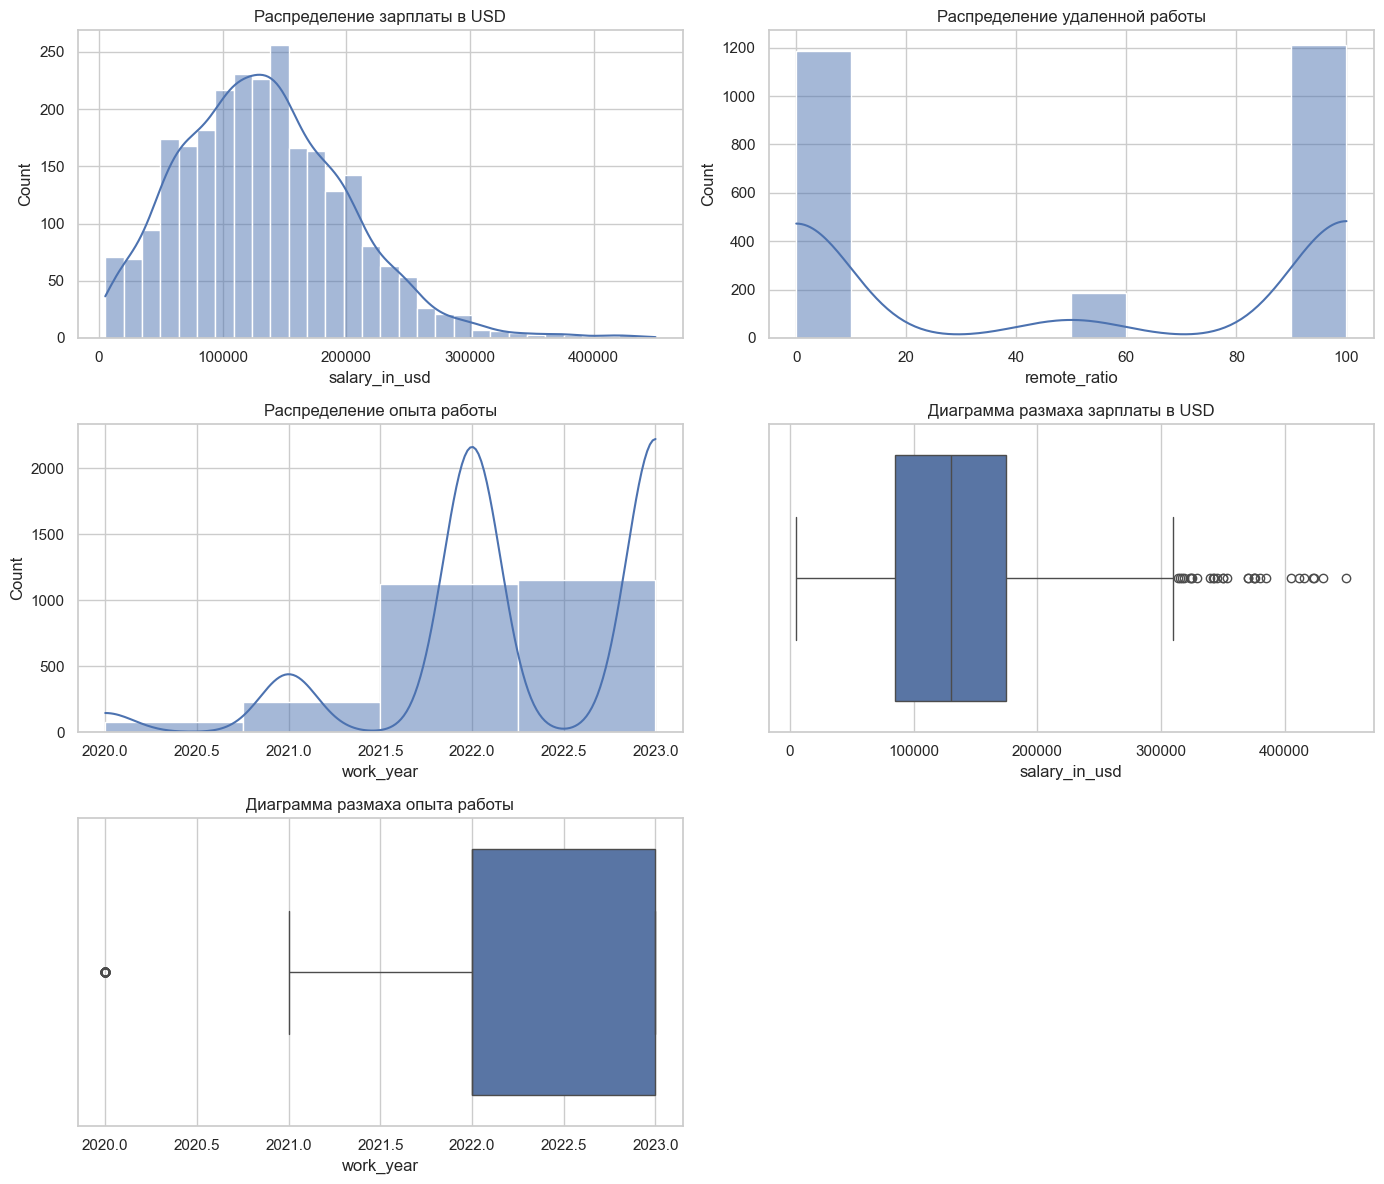

In [25]:
# Установка стиля визуализации
sns.set(style="whitegrid")

# Создание гистограмм для числовых переменных
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

sns.histplot(df_cleaned['salary_in_usd'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Распределение зарплаты в USD')

sns.histplot(df_cleaned['remote_ratio'], bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Распределение удаленной работы')

sns.histplot(df_cleaned['work_year'], bins=4, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Распределение опыта работы')

sns.boxplot(x='salary_in_usd', data=df_cleaned, ax=axes[1, 1])
axes[1, 1].set_title('Диаграмма размаха зарплаты в USD')

sns.boxplot(x='work_year', data=df_cleaned, ax=axes[2, 0])
axes[2, 0].set_title('Диаграмма размаха опыта работы')

# Последний subplot уберем
axes[2, 1].axis('off')

plt.tight_layout()
plt.show();

<H3> Анализ числовых данных </H3>

**Salary in USD:**

- Большинство значений находятся в диапазоне до $200000

- Есть небольшое количество высоких зарплат, вплоть до ~$450000

**Remote Ratio:**
- Преобладают значения 0% и 100%, что указывает на распределение между полностью удаленной и офисной работой

**Work Year:**
- Данные охватывают годы с 2020 по 2023, с наибольшим количеством записей за 2022 год

**Боксплоты:**
- **Salary in USD:**
    - Видны выбросы, особенно в верхнем диапазоне зарплат
- **Remote Ratio:**
    - Наблюдаются выбросы, но большинство данных сосредоточено на 0% и 100%
- **Work Year:**
    - Данных по годам немного, выбросов не выявлено


Далее более подробно изучим график зарплат

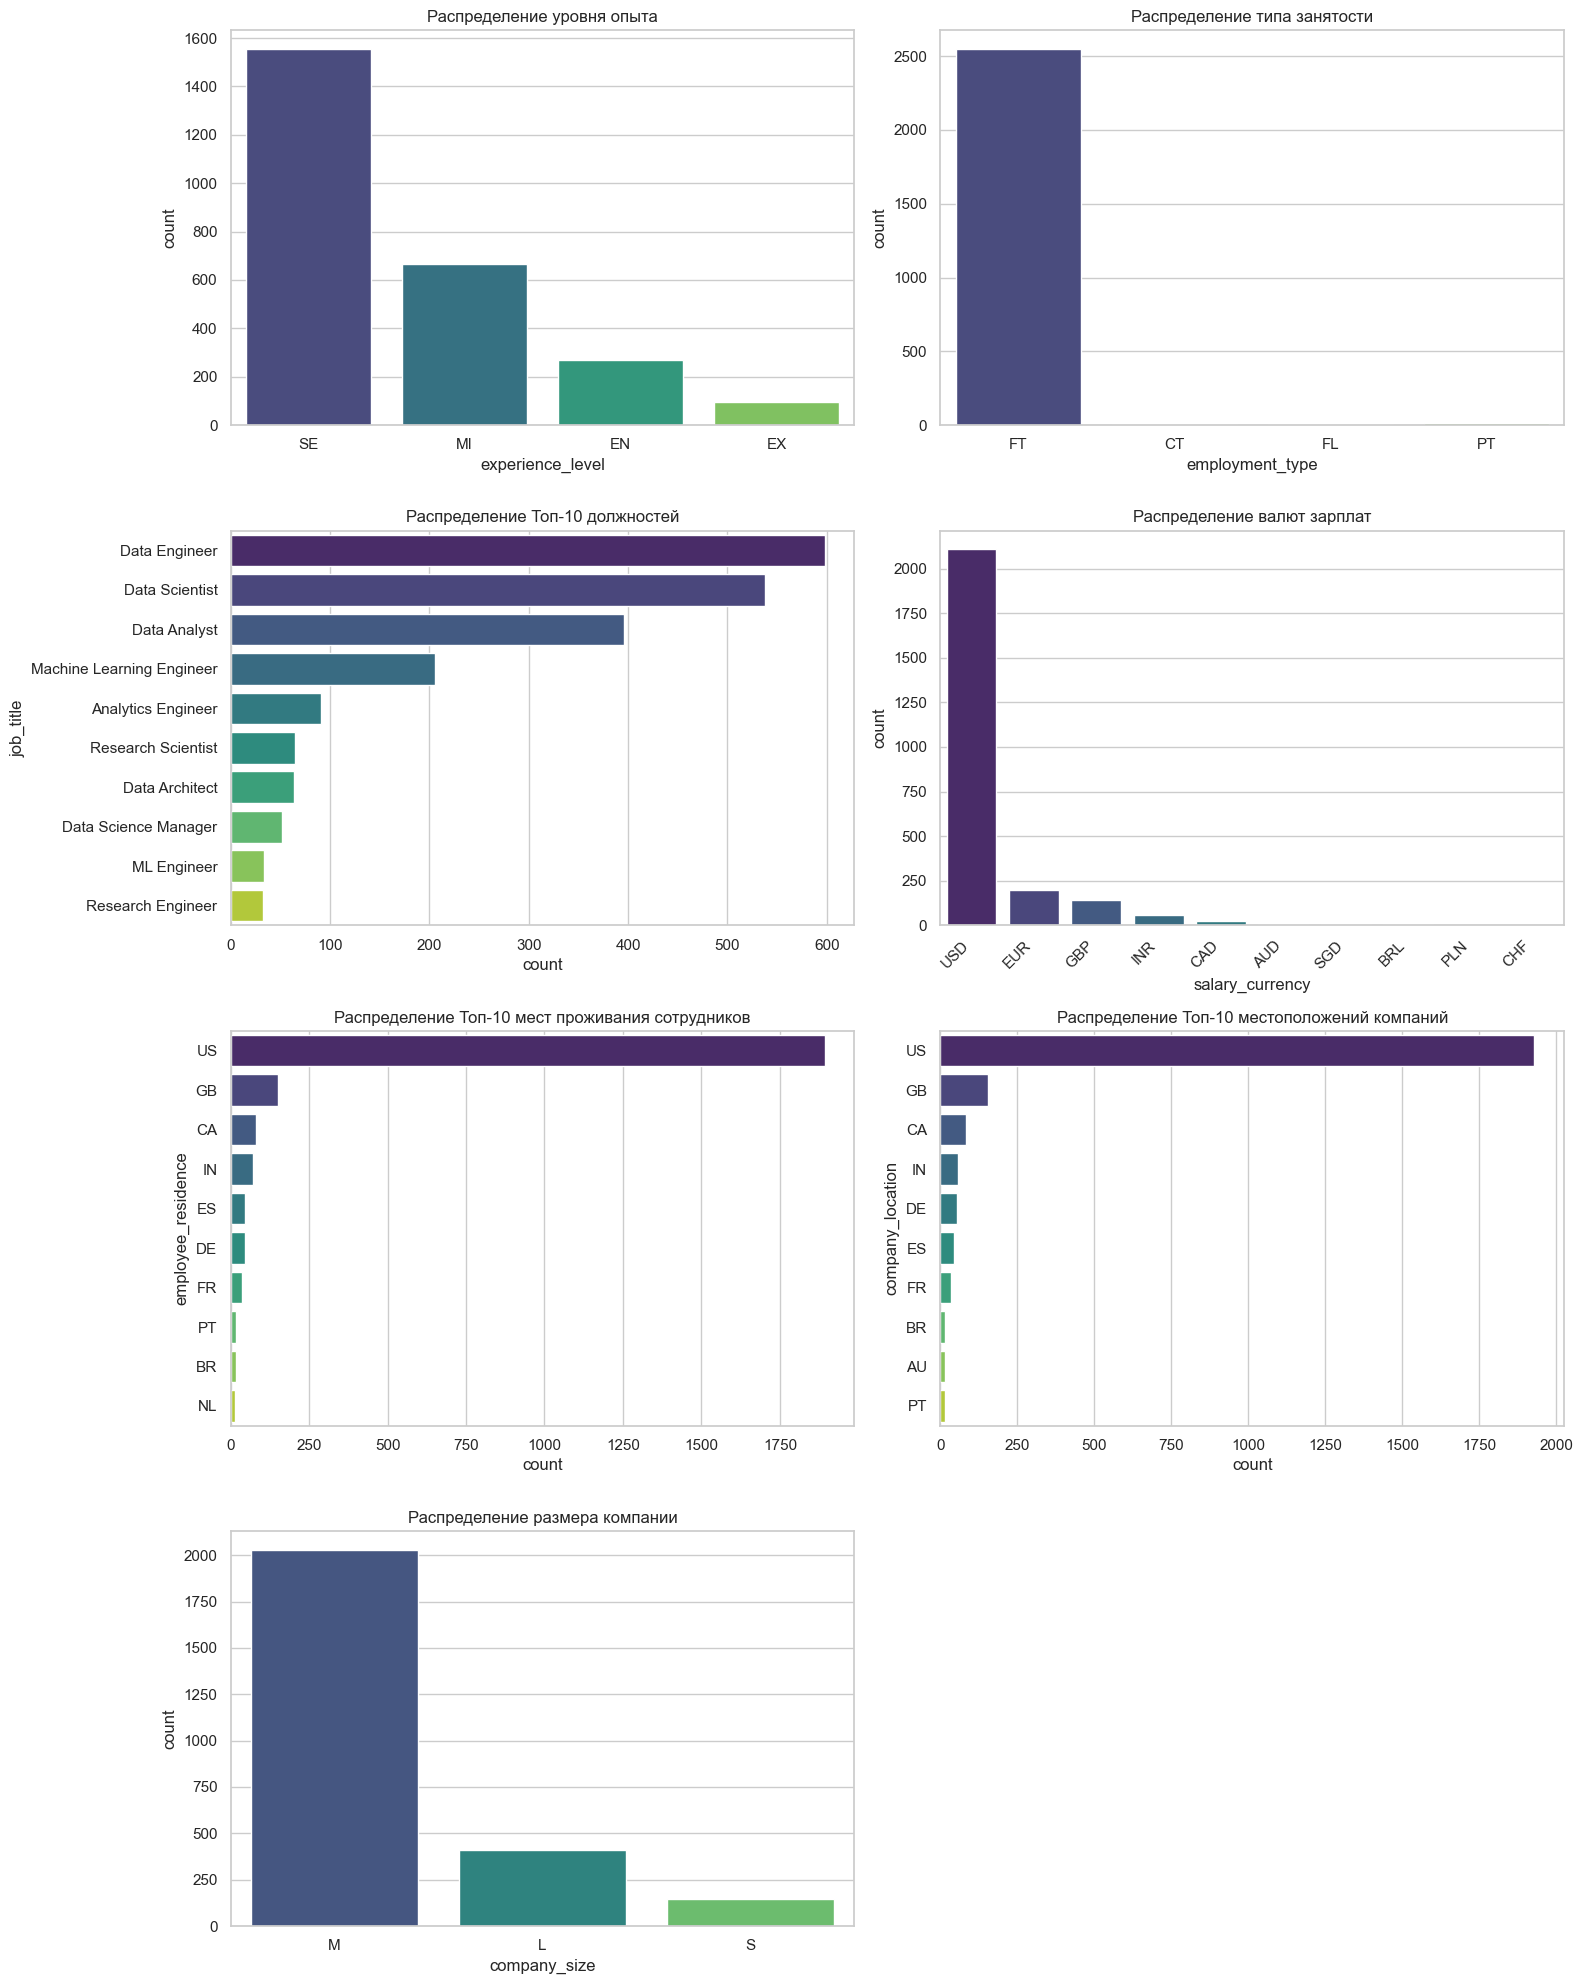

In [33]:
# Создание столбчатых диаграмм для категориальных переменных
fig, axes = plt.subplots(4, 2, figsize=(16, 20))

sns.countplot(x='experience_level', data=df_cleaned, palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Распределение уровня опыта')

sns.countplot(x='employment_type', data=df_cleaned, palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Распределение типа занятости')

sns.countplot(y='job_title', data=df_cleaned, order=df_cleaned['job_title'].value_counts().index[:10], palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Распределение Топ-10 должностей')

sns.countplot(x='salary_currency', data=df_cleaned, palette='viridis', ax=axes[1, 1], order=df_cleaned['salary_currency'].value_counts().index[:10])
axes[1, 1].set_title('Распределение валют зарплат')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')

sns.countplot(y='employee_residence', data=df_cleaned, order=df_cleaned['employee_residence'].value_counts().index[:10], palette='viridis', ax=axes[2, 0])
axes[2, 0].set_title('Распределение Топ-10 мест проживания сотрудников')

sns.countplot(y='company_location', data=df_cleaned, order=df_cleaned['company_location'].value_counts().index[:10], palette='viridis', ax=axes[2, 1])
axes[2, 1].set_title('Распределение Топ-10 местоположений компаний')

sns.countplot(x='company_size', data=df_cleaned, palette='viridis', ax=axes[3, 0], order=df_cleaned['company_size'].value_counts().index)
axes[3, 0].set_title('Распределение размера компании')

# Скрыть последний неиспользуемый subplot
axes[3, 1].axis('off')

plt.tight_layout()
plt.show();

<H3> Анализ категориальных данных </H3>

**Experience Level:**
- Преобладают уровни опыта SE (Senior) и MI (Mid-level)

**Employment Type:**
- Большинство позиций на полной занятости (FT)

**Top 10 Job Titles:**
- Наиболее частая должность — Data Engineer
  
**Salary Currency:**
- Большинство зарплат указаны в USD

**Top 10 Employee Residences:**
- Наиболее частое место проживания сотрудников — US

**Top 10 Company Locations:**
- Наиболее частое местоположение компаний — US

**Company Size:**
- Преобладают компании среднего размера (M)


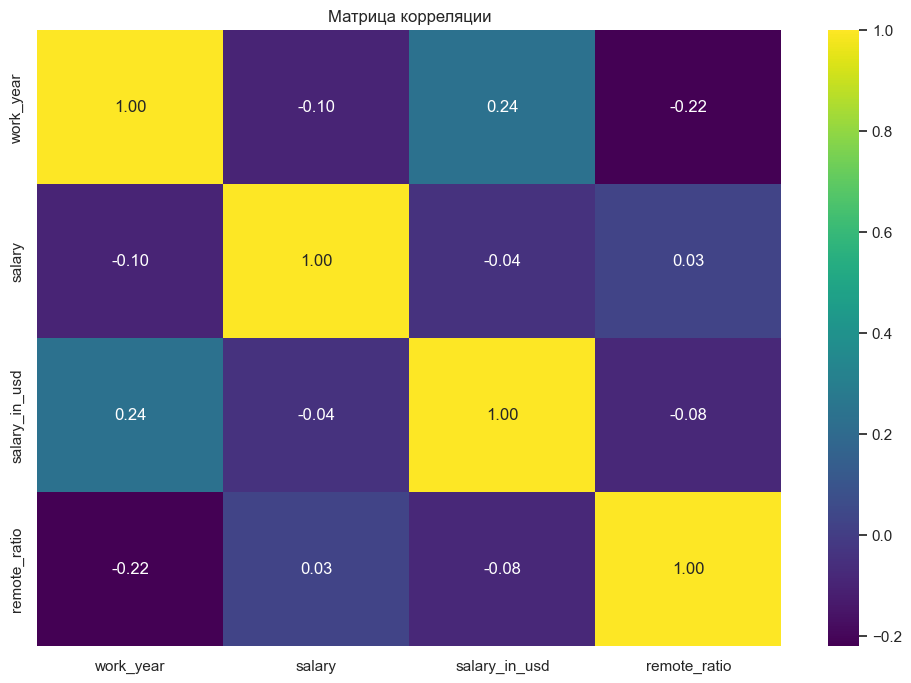

In [37]:
# Матрица корреляции
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(12, 8))

# Отрисовка тепловой карты
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='viridis')

plt.title('Матрица корреляции')
plt.show();

<H3> Корреляционная матрица: </H3> 

**Основные наблюдения:**
- Переменная `salary_in_usd` имеет слабую положительную корреляцию с `work_year` (0.14).
- `remote_ratio` и `work_year` не показывают значимой корреляции с другими переменными.
- Остальные корреляции между числовыми переменными очень слабые, что указывает на низкую взаимосвязь между ними.


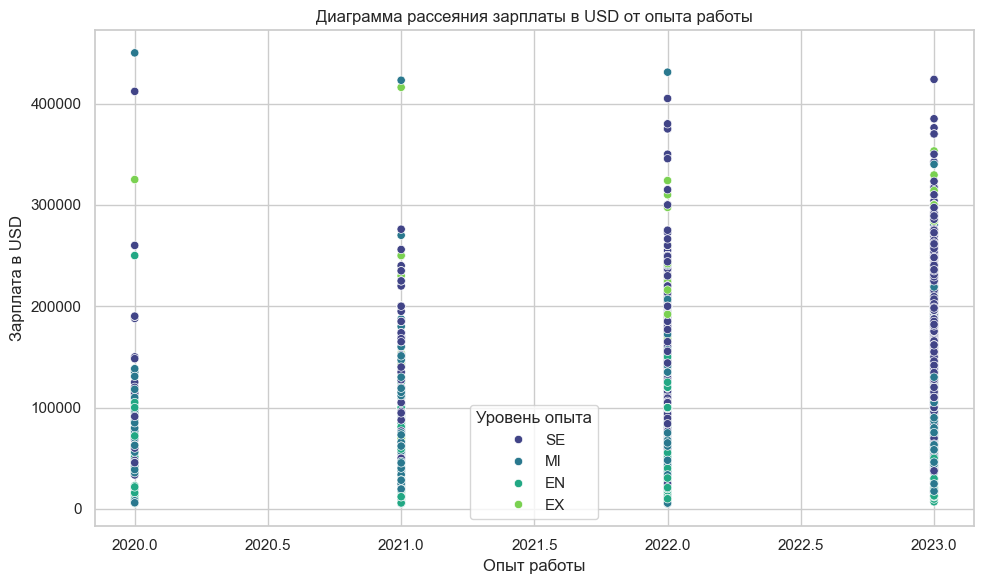

In [38]:
# Диаграмма рассеяния для выявления аномалий
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(x='work_year', y='salary_in_usd', hue='experience_level', palette='viridis', data=df_cleaned, ax=ax)

ax.set_title('Диаграмма рассеяния зарплаты в USD от опыта работы')
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Зарплата в USD')

plt.legend(title='Уровень опыта')
plt.tight_layout()
plt.show()

<H3> График рассеяния (Зарплата в USD от Опыта работы): </H3>

**Основные наблюдения:**
- Заметна концентрация зарплат до $200000 независимо от года и уровня опыта
- Есть несколько высоких значений зарплат, особенно для уровня SE (Senior) и EX (Executive)


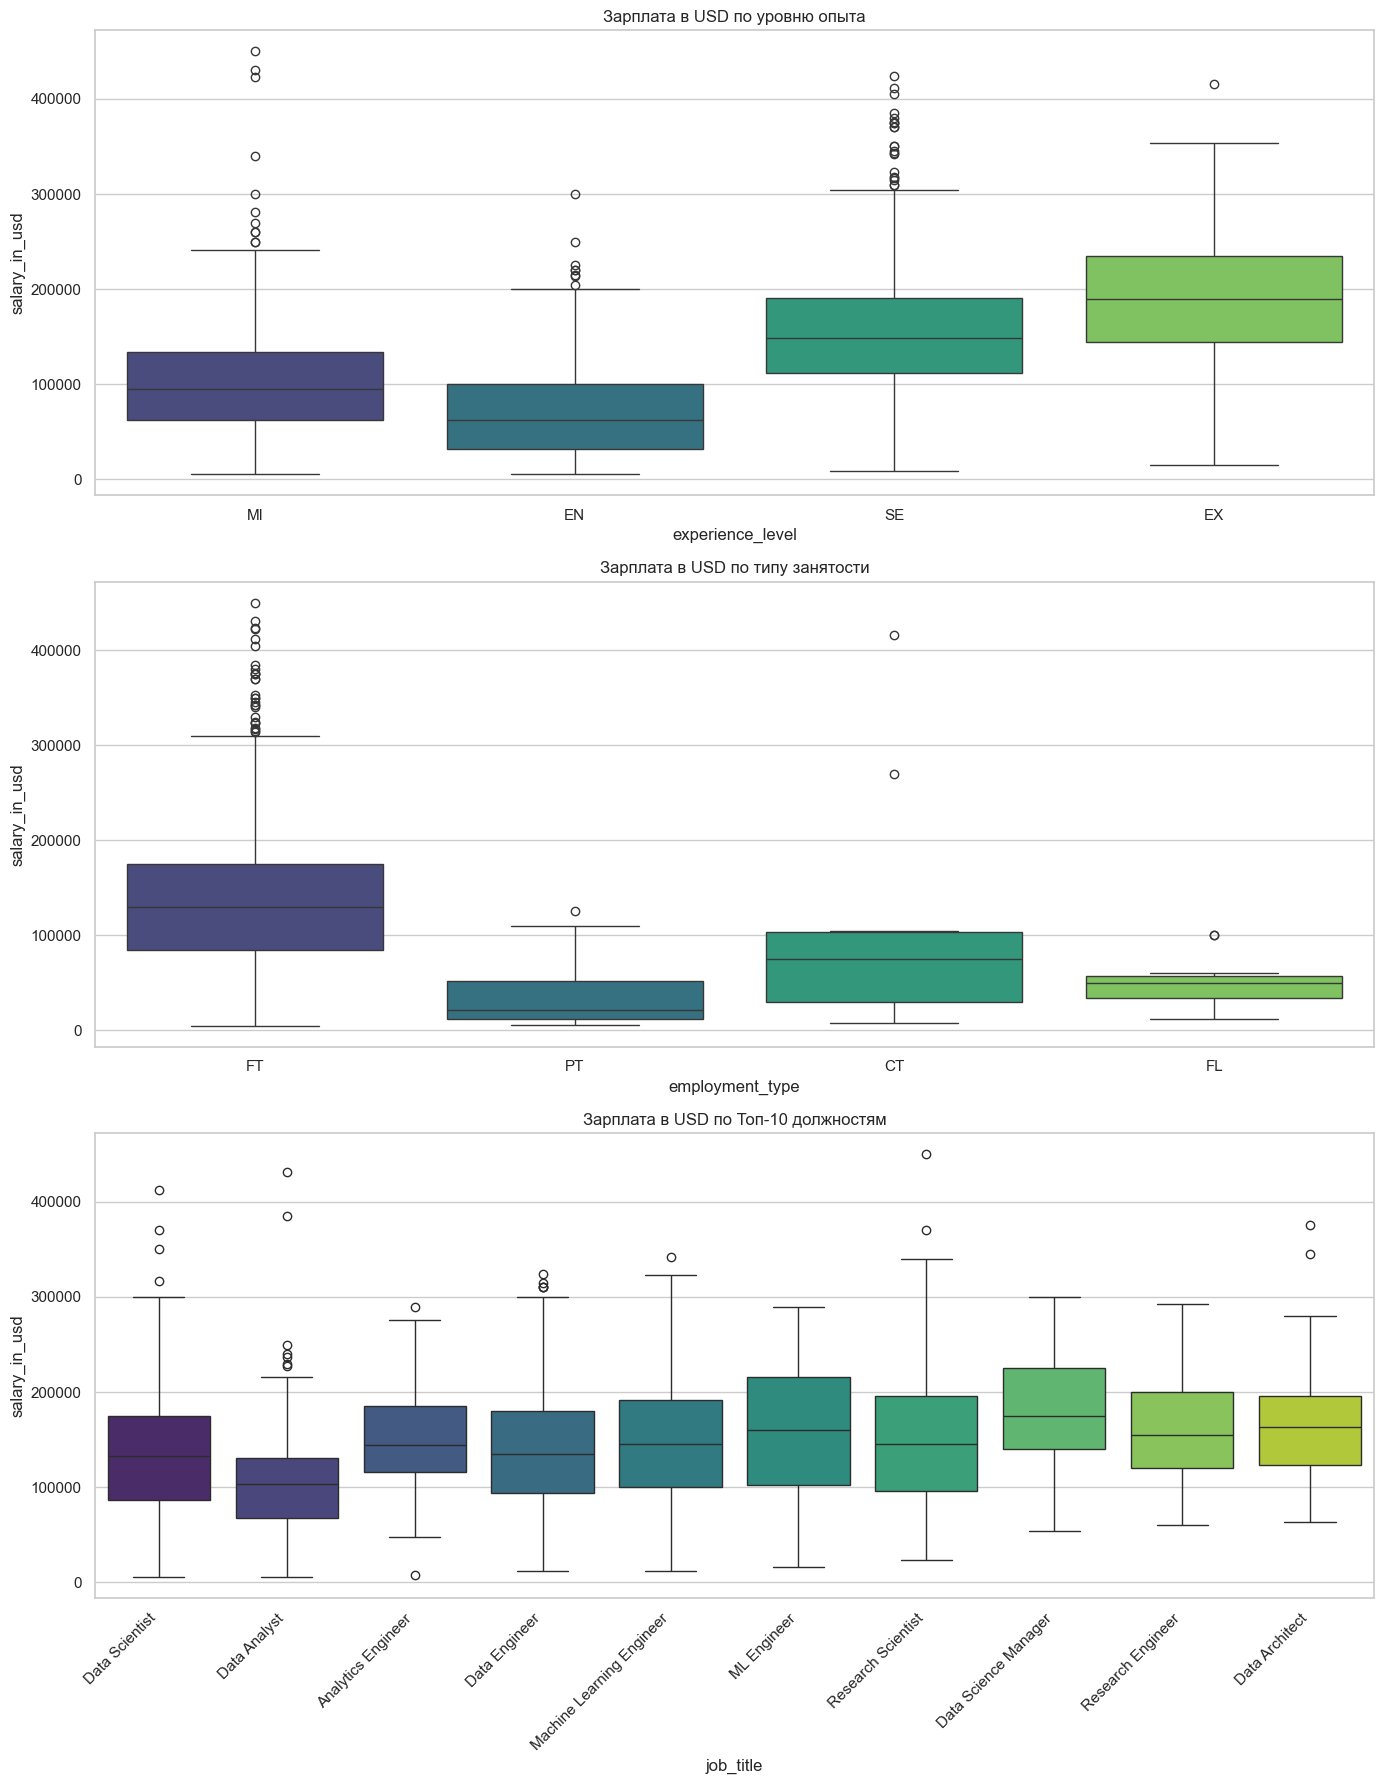

In [41]:
# Глубокий анализ зарплат по категориям

# Установка стиля визуализации
sns.set(style="whitegrid")

# Создание подграфиков для детального анализа зарплаты
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Зарплата по уровню опыта
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_cleaned.sort_values(by='salary_in_usd'), palette='viridis', ax=axes[0])
axes[0].set_title('Зарплата в USD по уровню опыта')

# Зарплата по типу занятости
sns.boxplot(x='employment_type', y='salary_in_usd', data=df_cleaned.sort_values(by='salary_in_usd'), palette='viridis', ax=axes[1])
axes[1].set_title('Зарплата в USD по типу занятости')

# Зарплата по должности (Топ-10)
top_10_titles = df_cleaned['job_title'].value_counts().index[:10]
sns.boxplot(x='job_title', y='salary_in_usd', data=df_cleaned[df_cleaned['job_title'].isin(top_10_titles)].sort_values(by='salary_in_usd'), palette='viridis', ax=axes[2])
axes[2].set_title('Зарплата в USD по Топ-10 должностям')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show();

Анализ изображения с зарплатами по различным категориям
1. Зарплата в USD по уровню опыта
   
SE (Senior): Имеет значительное количество выбросов выше $300000
MI (Mid-level): Зарплаты сгруппированы ближе к медиане, с значительными выбросами выше $200000
EN (Entry-level): Нижний уровень зарплат, с редкими выбросами
EX (Executive): Широкий диапазон зарплат с высокими значениями и несколькими выбросами

Выбросы неудивительны, т.к. компании зачастую называют должность ниже грейдом, возлагая более опытные задачи на сотрудника, соответственно зарпалата может быть выше рыночной, что и наблюдается на графике

2. Зарплата в USD по типу занятости
   
* FT (Full-time): Самый широкий диапазон зарплат, с множеством выбросов выше $300000
* CT (Contract): Низкие медианные зарплаты, с несколькими выбросами
* FL (Freelance): Узкий диапазон зарплат, с редкими выбросами
* PT (Part-time): Более высокий разброс зарплат по сравнению с другими типами занятости

Ожидаемые значения, потому что постоянные работники заняты намного больше и чаще, соответственно их зарплата выше. Выбросы перекликаются с грейдом сотрудников

3. Зарплата в USD по Топ-10 должностям
   
* ML Engineer, Data Scientist, Data Engineer: Широкие диапазоны зарплат с множеством выбросов
* Data Analyst: Более низкие зарплаты, с меньшим количеством выбросов
* Research Scientist, Data Science Manager: Значительные разбросы и наличие высоких выбросов

# 4. Выводы <a class="anchor" id="chapter4"></a>

<H3> Рекомендации по очистке данных </H3>

* Анализ выбросов:
    * Выбросы: Значительное количество выбросов, особенно для Senior и Executive уровней, а также для Full-time позиций и некоторых должностей (например, ML Engineer)
* Очистка по группам:
    * Опыт (Experience Level): Рекомендуется очищать выбросы отдельно по каждой категории опыта, так как диапазон зарплат сильно варьируется между уровнями
    * Тип занятости (Employment Type): Стоит рассмотреть отдельную очистку для Full-time позиций из-за их широкого диапазона зарплат
    * Должности (Job Titles): Для должностей с широкими диапазонами (например, ML Engineer) рекомендуется отдельная очистка, так как они имеют более высокие зарплаты и выбросы
* Методология очистки:
    * IQR Method (Метод межквартильного размаха): Выявление и удаление значений, которые выходят за пределы 
        `Q3+1.5×IQR`
    * Winsorization: Ограничение выбросов путем замены их крайними значениями

Про [Winsorization](https://www.codecamp.ru/blog/winsorize/)

In [43]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [44]:
# Очистка по уровням опыта
final_df = pd.DataFrame()
for level in df_cleaned['experience_level'].unique():
    level_df = df_cleaned[df_cleaned['experience_level'] == level]
    level_df_cleaned = remove_outliers(level_df, 'salary_in_usd')
    final_df = pd.concat([final_df, level_df_cleaned])

In [45]:
# Проверка результатов
print(final_df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count  2543.000000  2.543000e+03    2543.000000   2543.000000
mean   2022.300433  2.081514e+05  130340.275659     50.648840
std       0.745949  8.139673e+05   62533.584450     48.182667
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  9.000000e+04   84000.000000      0.000000
50%    2022.000000  1.323000e+05  128058.000000     50.000000
75%    2023.000000  1.800000e+05  172550.000000    100.000000
max    2023.000000  3.040000e+07  353200.000000    100.000000


In [47]:
100 * round((len(final_df) / len(df_cleaned)), 3)

98.4

Успешно провели очистку. 1,5% данных - малая доля